In [1]:
""" Proof of concept for the random-cut-hyperplanes idea """
import sys
import numpy as np
import time

from planes import *
from projections import *
from iforest import *
from run import *
%load_ext autoreload
%autoreload 2

In [2]:
n_estimators = 100  # Get a somewhat stable approximation
SCORE_AT = 2.5

n = 1000 # number of entries
p = 30  # features

infection_pct = 0.05
X, y = gen_two_clusters(n, p, infection_pct)
#X, y = gen_hard_data(n, p, infection_pct)

anomalous_depths_r = list()
non_anomalous_depths_r = list()

anomalous_depths_ro = list()
non_anomalous_depths_ro = list()

anomalous_depths_i = list()
non_anomalous_depths_i = list()

anomalous_depths_rcf = list()
non_anomalous_depths_rcf = list()
t_r, t_ro, t_i, t_rcf = 0, 0, 0, 0

for i in range(1, 6):
    #if i % 10 == 0:
    print(f"Iteration number : {i}")
    start = time.time()
    scores_ro, depths_ro, y_pred_ro, y_ro, anom_ro, non_anom_ro = run_plane_simul_old(X, y, 
                                                                            n_estimators=n_estimators)
    stop = time.time()
    t_ro = (t_ro*(i-1) + (stop - start))/i
    start = stop
    
    scores_r, depths_r, y_pred_r, y_r, anom_r, non_anom_r = run_plane_simul(X, y, 
                                                                            n_estimators=n_estimators,
                                                                            method='rcf')
    stop = time.time()
    t_r = (t_r*(i-1) + (stop - start))/i
    start = stop
    
    scores_i, depths_i, y_pred_i, y_i, anom_i, non_anom_i = run_iforest_simul(X, y, n_estimators=n_estimators,
                                                                              method='iforest')
    stop = time.time()
    t_i = (t_i*(i-1) + (stop - start))/i
    start = stop
    scores_rcf, depths_rcf, y_pred_rcf, y_rcf, anom_rcf, non_anom_rcf = run_iforest_simul(X, y, 
                                                                                          n_estimators=n_estimators,
                                                                                          method='rcf')
    stop = time.time()
    t_rcf = (t_rcf*(i-1) + (stop - start))/i

    anomalous_depths_r.append(anom_r)
    non_anomalous_depths_r.append(non_anom_r)
    
    anomalous_depths_ro.append(anom_ro)
    non_anomalous_depths_ro.append(non_anom_ro)

    anomalous_depths_i.append(anom_i)
    non_anomalous_depths_i.append(non_anom_i)

    anomalous_depths_rcf.append(anom_rcf)
    non_anomalous_depths_rcf.append(non_anom_rcf)

print(f"For rhp anom/non_anom: {np.mean(anomalous_depths_r)}, {np.mean(non_anomalous_depths_r)}")
print(f"Time taken for rhp: {t_r}")
print(f"For old rhp anom/non_anom: {np.mean(anomalous_depths_ro)}, {np.mean(non_anomalous_depths_ro)}")
print(f"Time taken for old rhp: {t_ro}")
print(f"For iforest anom/non_anom: {np.mean(anomalous_depths_i)}, {np.mean(non_anomalous_depths_i)}")
print(f"Time taken for iForests: {t_i}")
print(f"For RCF anom/non_anom: {np.mean(anomalous_depths_rcf)}, {np.mean(non_anomalous_depths_rcf)}")
print(f"Time taken for rcf: {t_rcf}")


Iteration number : 1
Iteration number : 2
Iteration number : 3
Iteration number : 4
Iteration number : 5
For rhp anom/non_anom: 7.3508, 15.307539393939397
Time taken for rhp: 17.581548261642457
For old rhp anom/non_anom: 7.254799999999999, 17.92408080808081
Time taken for old rhp: 14.054297733306885
For iforest anom/non_anom: 17.4884, 18.286169696969694
Time taken for iForests: 47.776740646362306
For RCF anom/non_anom: 7.306800000000001, 17.503064646464647
Time taken for rcf: 90.324982213974


In [3]:
import matplotlib.pyplot as plt
X, y = gen_two_clusters(n=n, p=2, infection_pct=0.05)

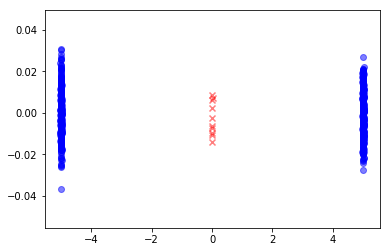

In [4]:
X_non = X[np.where(y == 0)]
X_ano = X[np.where(y == 1)]

plt.scatter(X_non[:, 0], X_non[:, 1], c='b', marker='o', alpha=0.5)
plt.scatter(X_ano[:, 0], X_ano[:, 1], c='r', marker='x', alpha=0.5)
plt.show()

In [5]:
rhp = RandomProjectionForest(n_estimators=100)
rhp = rhp.fit(X)

In [6]:
y_pred = rhp.predict(X, score_at=97.5)

In [7]:
X_pred_non = X[np.where(y_pred == 0)]
X_pred_ano = X[np.where(y_pred == 1)]

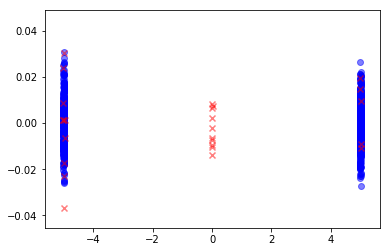

In [8]:
plt.scatter(X_pred_non[:, 0], X_pred_non[:, 1], c='b', marker='o', alpha=0.5)
plt.scatter(X_pred_ano[:, 0], X_pred_ano[:, 1], c='r', marker='x', alpha=0.5)
plt.show()

In [9]:
xx, yy = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-0.05, 0.05, 100))
Z = 1 - rhp.decision_function(np.c_[xx.ravel(), yy.ravel()])

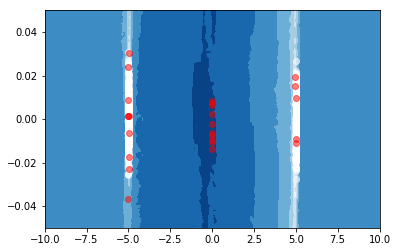

In [10]:
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)
b1 = plt.scatter(X_pred_non[:, 0], X_pred_non[:, 1], c='w', alpha=0.5)
b2 = plt.scatter(X_pred_ano[:, 0], X_pred_ano[:, 1], c='r', alpha=0.5)
plt.show()

In [11]:
rhp = IsolationForest(n_estimators=100, method='rcf')
rhp = rhp.fit(X)

In [12]:
y_pred = rhp.predict(X, score_at=97.5)

In [13]:
X_pred_non = X[np.where(y_pred == 0)]
X_pred_ano = X[np.where(y_pred == 1)]

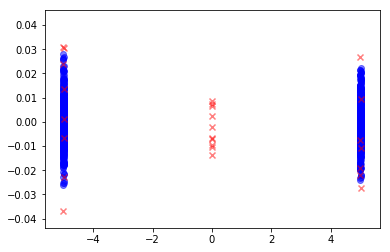

In [14]:
plt.scatter(X_pred_non[:, 0], X_pred_non[:, 1], c='b', marker='o', alpha=0.5)
plt.scatter(X_pred_ano[:, 0], X_pred_ano[:, 1], c='r', marker='x', alpha=0.5)
plt.show()

In [15]:
xx, yy = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-0.05, 0.05, 100))
Z = 1 - rhp.decision_function(np.c_[xx.ravel(), yy.ravel()])

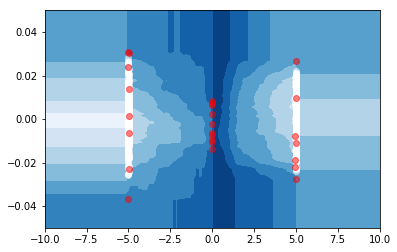

In [16]:
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)
b1 = plt.scatter(X_pred_non[:, 0], X_pred_non[:, 1], c='w', alpha=0.5)
b2 = plt.scatter(X_pred_ano[:, 0], X_pred_ano[:, 1], c='r', alpha=0.5)
plt.show()